In [139]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
transactions= pd.read_excel('KPMG.xlsx', sheet_name='Transactions')
#new_customer_lists = pd.read_excel('KPMG.xlsx', sheet_name='NewCustomerList')
#customer_demographic = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')
#customer_add = pd.read_excel('KPMG.xlsx', sheet_name='CustomerAddress')


In [3]:
transactions.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"transaction_id"}, inplace = True)
transactions.rename(columns={
                   "Unnamed: 1":"product_id",
                   "Unnamed: 2":"customer_id",
                   "Unnamed: 3":"transaction_date",
                    "Unnamed: 4":"online_order",
                   "Unnamed: 5":"order_status",
                    "Unnamed: 6":"brand"
                   }, inplace = True)
transactions.rename(columns={
                    
                    "Unnamed: 7":"product_line",
                   "Unnamed: 8":"product_class",
                   "Unnamed: 9":"product_size",
                   "Unnamed: 10":"list_price",
                   "Unnamed: 11":"standard_cost",
                    "Unnamed: 12":"product_first_sold_date"}, inplace=True)
                   
transactions=transactions.iloc[1:]
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
6,6,25,2339,2017-03-08 00:00:00,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031
7,7,22,1542,2017-04-21 00:00:00,True,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165
8,8,15,2459,2017-07-15 00:00:00,False,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915
9,9,67,1305,2017-08-10 00:00:00,False,Approved,Solex,Standard,medium,large,1071.23,380.74,33455
10,10,12,3262,2017-08-30 00:00:00,True,Approved,WeareA2B,Standard,medium,medium,1231.15,161.6,38216


In [4]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
transaction_id             20000 non-null object
product_id                 20000 non-null object
customer_id                20000 non-null object
transaction_date           20000 non-null object
online_order               19640 non-null object
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null object
standard_cost              19803 non-null object
product_first_sold_date    19803 non-null object
dtypes: object(13)
memory usage: 2.0+ MB


In [6]:
#'product_first_sold_date' columns are stored as integers. Both colums should be changed to date.

transactions['product_first_sold_date']=pd.to_datetime(transactions['product_first_sold_date'], unit='s')

transactions['product_first_sold_date'].head()


1   1970-01-01 11:27:25
2   1970-01-01 11:35:01
3   1970-01-01 10:06:01
4   1970-01-01 10:02:25
5   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [7]:
transactions['product_first_sold_date']

1       1970-01-01 11:27:25
2       1970-01-01 11:35:01
3       1970-01-01 10:06:01
4       1970-01-01 10:02:25
5       1970-01-01 11:43:46
6       1970-01-01 10:50:31
7       1970-01-01 09:29:25
8       1970-01-01 11:05:15
9       1970-01-01 09:17:35
10      1970-01-01 10:36:56
11      1970-01-01 11:19:44
12      1970-01-01 11:42:52
13      1970-01-01 09:35:27
14      1970-01-01 09:36:26
15      1970-01-01 10:36:33
16      1970-01-01 10:31:13
17      1970-01-01 10:36:46
18      1970-01-01 09:24:48
19      1970-01-01 11:05:15
20      1970-01-01 10:22:17
21      1970-01-01 10:05:34
22      1970-01-01 10:06:01
23      1970-01-01 11:42:25
24      1970-01-01 11:46:44
25      1970-01-01 09:27:59
26      1970-01-01 11:42:25
27      1970-01-01 11:24:07
28      1970-01-01 11:49:20
29      1970-01-01 11:51:50
30      1970-01-01 11:38:42
                ...        
19971   1970-01-01 11:27:25
19972   1970-01-01 10:20:20
19973   1970-01-01 10:45:50
19974   1970-01-01 09:17:09
19975   1970-01-01 0

The integers in the date columns are not correct as it shows everything happening the same day at different times. We would need to refer back to the author of the data to seek more clasrification on how the data was collected.



In [8]:
transactions.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.0,20000.0,20000.0,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000.0,101.0,3494.0,364,2,2,6,4,3,3,296.00,103.00,100
top,20000.0,0.0,2476.0,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,1970-01-01 09:24:39
freq,1.0,1378.0,14.0,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 09:14:19
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 11:51:50


# Exploring Missing Values¶


In [9]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# Identifying Duplicate Values


In [10]:
duplicate=transactions.duplicated()
transactions[duplicate].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

# Exploring Columns


In [11]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [12]:
transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [13]:
transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [14]:
transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [15]:
transactions['product_class'].value_counts()


medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [16]:
transactions['product_size'].value_counts()


medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

## no problem with column as the data is consistent

# new_customer_list -Table

In [17]:
new_customer_lists = pd.read_excel('KPMG.xlsx', sheet_name='NewCustomerList')

In [18]:
new_customer_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 23 columns):
Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.     1001 non-null object
Unnamed: 1                                                                                                                                                                       972 non-null object
Unnamed: 2                                                                                                                                                                       1001 non-null object
Unnamed: 3                                                                                                                                                                       1001 non-null object
Unnamed: 4                                                                                            

In [19]:
new_customer_lists.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312


In [20]:
cols=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
new_customer_lists=new_customer_lists.drop(cols,axis=1)

In [21]:
new_customer_lists.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312


In [22]:
new_customer_lists.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"first_name"}, inplace = True)
new_customer_lists.rename(columns={
                   "Unnamed: 1":"last_name",
                   "Unnamed: 2":"gender",
                   "Unnamed: 3":"past_3_years_bike_related_purchases",
                    "Unnamed: 4":"DOB",
                   "Unnamed: 5":"job_title",
                    "Unnamed: 6":"job_industry_category"
                   }, inplace = True)
new_customer_lists.rename(columns={
                    
                    "Unnamed: 7":"wealth_segment",
                   "Unnamed: 8":"deceased_indicator",
                   "Unnamed: 9":"owns_car",
                   "Unnamed: 10":"tenure",
                   "Unnamed: 11":"address",
                    "Unnamed: 12":"postcode",
                    "Unnamed: 13":"state",
                    "Unnamed: 14":"country",
                    "Unnamed: 15":"property_valuation",
                    "Unnamed: 21":"Rank",
                    "Unnamed: 22":"Value"}, inplace=True)
                   
new_customer_lists=new_customer_lists.iloc[1:]
new_customer_lists

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312
6,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7,6,1.67188
7,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.67188
8,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,N,Yes,10,85 Carioca Point,4814,QLD,Australia,5,8,1.65625
9,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.65625
10,Barthel,Docket,Male,72,1985-08-02,Accounting Assistant IV,IT,Mass Customer,N,Yes,17,80 Scofield Junction,4151,QLD,Australia,5,10,1.64062


In [23]:
new_customer_lists.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [24]:
new_customer_lists.duplicated().sum()

0

In [25]:
new_customer_lists=new_customer_lists.drop(['deceased_indicator'],axis=1)

# Explore Columns

In [26]:
new_customer_lists['gender'].value_counts()


Female    513
Male      470
U          17
Name: gender, dtype: int64

In [27]:
new_customer_lists['gender'].str.replace('U','Unspecified')

1              Male
2              Male
3            Female
4            Female
5            Female
6            Female
7              Male
8            Female
9              Male
10             Male
11             Male
12             Male
13             Male
14           Female
15           Female
16             Male
17           Female
18           Female
19           Female
20           Female
21             Male
22             Male
23             Male
24           Female
25           Female
26             Male
27           Female
28           Female
29           Female
30           Female
           ...     
971          Female
972          Female
973            Male
974          Female
975          Female
976            Male
977            Male
978          Female
979            Male
980            Male
981          Female
982          Female
983            Male
984          Female
985     Unspecified
986          Female
987            Male
988          Female
989          Female


There are 17 Uspecified values

In [28]:
new_customer_lists['DOB'].describe()

count            983
unique           961
top       1998-02-05
freq               2
Name: DOB, dtype: object

# Column Customer Demographic

In [29]:
customer_demographic = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')

In [30]:
customer_demographic.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [31]:
customer_demographic.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
customer_demographic.rename(columns={
                   "Unnamed: 1":"first_name",
                   "Unnamed: 2":"last_name",
                   "Unnamed: 3":"gender",
                    "Unnamed: 4":"past_3_years_bike_related_purchases",
                   "Unnamed: 5":"DOB",
                    "Unnamed: 6":"job_title"
                   }, inplace = True)
customer_demographic.rename(columns={
                    
                    "Unnamed: 7":"job_industry_category	",
                   "Unnamed: 8":"wealth_segment",
                   "Unnamed: 9":"deceased_indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                    "Unnamed: 12":"tenure"}, inplace=True)
                   
customer_demographic=customer_demographic.iloc[1:]
customer_demographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
6,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13
7,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11
8,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7
9,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8
10,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20


In [32]:
customer_demographic=customer_demographic.drop(['deceased_indicator'],axis=1)

In [33]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 12 columns):
customer_id                            4000 non-null object
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null object
DOB                                    3913 non-null object
job_title                              3494 non-null object
job_industry_category	                 3344 non-null object
wealth_segment                         4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null object
dtypes: object(12)
memory usage: 375.1+ KB


In [34]:
customer_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category\t                656
wealth_segment                           0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [35]:
customer_demographic.duplicated().sum()

0

In [36]:
customer_demographic['default'].value_counts

<bound method IndexOpsMixin.value_counts of 1                                                      "'
2                            <script>alert('hi')</script>
3                                     2018-02-01 00:00:00
4       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
5                                                     NIL
6                                                ðµ ð ð ð
7                                               â°â´âµâââ
8                                 (â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)
9                                                     0/0
10                                                   ð©ð½
11                                     ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ
12                                                    nil
13                                                   -100
14                                                 â°â´âµ
15                                                      ð
16      1000000000000000049861653971908893017010268485...
17                       ï¾ï

##  Default is an Irrelevant Column hence Droping it

In [37]:
customer_demographic=customer_demographic.drop(['default'],axis=1)

In [38]:
customer_demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

## Gender Column has different values for two categories

In [39]:
customer_demographic['gender'] = customer_demographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')


In [40]:
customer_demographic['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

# Column customer_add 

In [41]:
customer_add = pd.read_excel('KPMG.xlsx', sheet_name='CustomerAddress')


In [42]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.     4000 non-null object
Unnamed: 1                                                                                                                                                                       4000 non-null object
Unnamed: 2                                                                                                                                                                       4000 non-null object
Unnamed: 3                                                                                                                                                                       4000 non-null object
Unnamed: 4                                                                                            

In [43]:
customer_add.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [44]:
customer_add.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
customer_add.rename(columns={
                   "Unnamed: 1":"address",
                   "Unnamed: 2":"postcode",
                   "Unnamed: 3":"state",
                    "Unnamed: 4":"country",
                   "Unnamed: 5":"property_valuation",
                    
                   }, inplace = True)

customer_add=customer_add.iloc[1:]
customer_add


,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
6,7,4 Delaware Trail,2210,New South Wales,Australia,9
7,8,49 Londonderry Lane,2650,New South Wales,Australia,4
8,9,97736 7th Trail,2023,New South Wales,Australia,12
9,11,93405 Ludington Park,3044,VIC,Australia,8
10,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [45]:
customer_add.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

## This Column doesn't require data cleaning 

#  Since the datasets  are regarding Customers we can merge all customer information from new_customer_lists and customer_demographic  tables into one table¶


In [50]:
new_customer_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 17 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null object
DOB                                    983 non-null object
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null object
address                                1000 non-null object
postcode                               1000 non-null object
state                                  1000 non-null object
country                                1000 non-null object
property_valuation                     1000 non-null obje

In [51]:
new_customer_lists.head()


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312


In [52]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,Yes,8


In [53]:
customer_demographic['customer_id'].iloc[-1:]

4000    4000
Name: customer_id, dtype: object

## We need to add 'Customer Id' column to new_customer_lists to enable us merge the tables vertically



In [54]:
merge_demographic=customer_demographic
merge_new_list=new_customer_lists


In [55]:
merge_new_list.insert(0,'customer_id',range(4001, 4001 + len(merge_new_list)))

In [56]:
merge_new_list.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,4003,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312


##  We need to merge the Customer Demographic with the Customer Address table before joining with New Customer List



In [57]:
customer_add.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [58]:
merge_add=customer_add

In [59]:
# Merge dataframes using the customer_id column
merge_demographic=pd.merge(merge_demographic,merge_add,how='left',on='customer_id')

In [60]:
merge_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,Yes,16,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,Yes,15,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,No,7,0 Holy Cross Court,4211,QLD,Australia,9
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,Yes,8,17979 Del Mar Point,2448,New South Wales,Australia,4


In [61]:
print(merge_new_list.info())
print(merge_demographic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
customer_id                            1000 non-null int64
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null object
DOB                                    983 non-null object
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null object
address                                1000 non-null object
postcode                               1000 non-null object
state                                  1000 non-null object
country                                1000 non-null objec

# Merging both the tables

In [62]:
merged_df = pd.concat([merge_demographic, merge_new_list], ignore_index=True, sort=False)


In [63]:
merged_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,job_industry_category,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,Yes,16,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,Yes,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,No,7,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,Yes,8,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN,NaN
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,Yes,13,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN,NaN
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,Yes,11,4 Delaware Trail,2210,New South Wales,Australia,9,NaN,NaN,NaN
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,No,7,49 Londonderry Lane,2650,New South Wales,Australia,4,NaN,NaN,NaN
8,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8,97736 7th Trail,2023,New South Wales,Australia,12,NaN,NaN,NaN
9,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
customer_id                            5000 non-null object
first_name                             5000 non-null object
last_name                              4846 non-null object
gender                                 5000 non-null object
past_3_years_bike_related_purchases    5000 non-null object
DOB                                    4896 non-null object
job_title                              4388 non-null object
job_industry_category	                 3344 non-null object
wealth_segment                         5000 non-null object
owns_car                               5000 non-null object
tenure                                 4913 non-null object
address                                4996 non-null object
postcode                               4996 non-null object
state                                  4996 non-null object
country                                4996 non-null 

# Visualizing customer_demographic table in detail

In [65]:
customer_demographic.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,Yes,8
6,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,Yes,13
7,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,Yes,11
8,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,No,7
9,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8
10,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20


In [114]:
#customer_demographic['DOB'] = customer_demographic['DOB'].apply('{:06}'.format)
#customer_demographic['DOB']=(pd.to_datetime('today')-pd.to_datetime(customer_demographic['DOB']))

TypeError: unsupported format string passed to Timedelta.__format__

In [113]:
customer_demographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,18440 days 14:05:21.710888,Executive Secretary,Health,Mass Customer,Yes,11
2,2,Eli,Bockman,Male,81,18440 days 14:05:21.710756,Administrative Officer,Financial Services,Mass Customer,Yes,16
3,3,Arlin,Dearle,Male,61,18440 days 14:05:21.710887,Recruiting Manager,Property,Mass Customer,Yes,15
4,4,Talbot,NaN,Male,33,18440 days 14:05:21.710849,NaN,IT,Mass Customer,No,7
5,5,Sheila-kathryn,Calton,Female,56,18440 days 14:05:21.710773,Senior Editor,NaN,Affluent Customer,Yes,8
6,6,Curr,Duckhouse,Male,35,18440 days 14:05:21.710825,NaN,Retail,High Net Worth,Yes,13
7,7,Fina,Merali,Female,6,18440 days 14:05:21.710779,NaN,Financial Services,Affluent Customer,Yes,11
8,8,Rod,Inder,Male,31,18440 days 14:05:21.710847,Media Manager I,NaN,Mass Customer,No,7
9,9,Mala,Lind,Female,97,18440 days 14:05:21.710794,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8
10,10,Fiorenze,Birdall,Female,49,18440 days 14:05:21.710718,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20


In [66]:
customer_demographic['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [67]:
customer_demographic.dtypes

customer_id                            object
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category\t                object
wealth_segment                         object
owns_car                               object
tenure                                 object
dtype: object

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


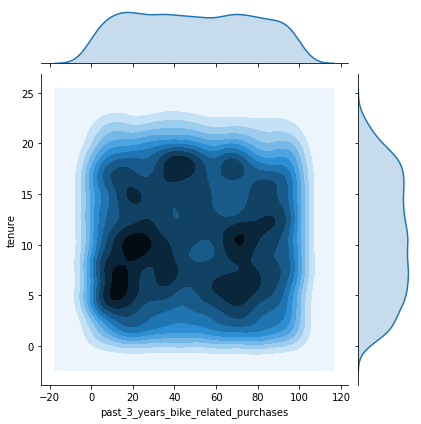

In [68]:
sns.jointplot(x='past_3_years_bike_related_purchases',y='tenure',data=customer_demographic,kind='kde')

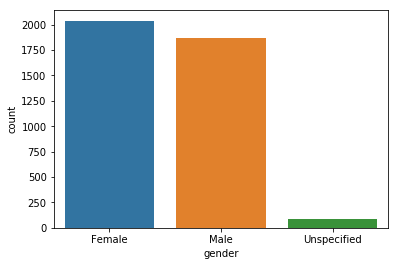

In [69]:
sns.countplot('gender',data=customer_demographic)

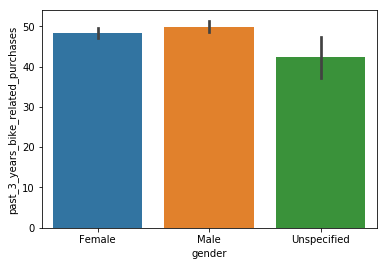

In [70]:
sns.barplot(x='gender',y='past_3_years_bike_related_purchases',data=customer_demographic)

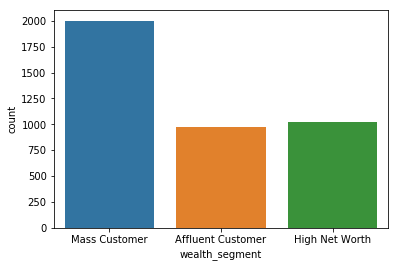

In [71]:
sns.countplot('wealth_segment',data=customer_demographic)

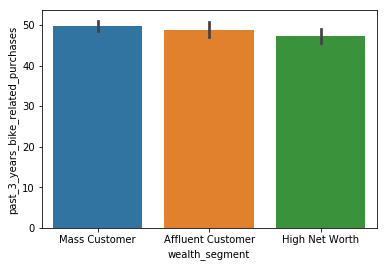

In [72]:
sns.barplot(x='wealth_segment',y='past_3_years_bike_related_purchases',data=customer_demographic)

In [73]:
#sns.pairplot(customer_demographic,hue='gender')
customer_demographic['job_industry_category\t'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category\t, dtype: int64

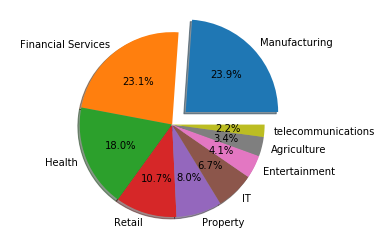

In [74]:
# Data to plot
labels = ('Manufacturing', 'Financial Services', 'Health', 'Retail' , 'Property','IT','Entertainment','Agriculture','telecommunications')
sizes = [799, 774, 602, 358,267,223,136,113,72]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice ie how much slice will be separated

# Plot
plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True)#autopct will show percentage in floating channel

plt.axis('equal')
plt.show()

[Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Financial Services'),
 Text(0, 0, 'Health'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Property'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'Entertainment'),
 Text(0, 0, 'Agriculture'),
 Text(0, 0, 'Telecommunications')]

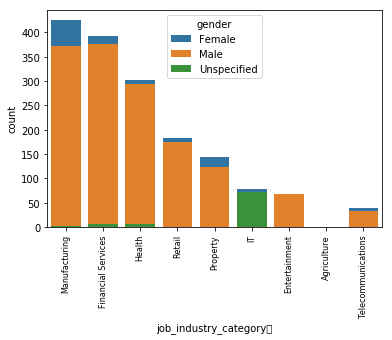

In [91]:
#sns.barplot(x=,y=,orient='v',data=)

p=sns.countplot(x='job_industry_category\t', hue='gender', data=customer_demographic,order=['Manufacturing','Financial Services','Health','Retail','Property','IT','Entertainment','Agriculture','Telecommunications'], dodge=False);
p.set_xticklabels(labels=['Manufacturing','Financial Services','Health','Retail','Property','IT','Entertainment','Agriculture','Telecommunications'],rotation=90, fontsize=8)


[Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Financial Services'),
 Text(0, 0, 'Health'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Property'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'Entertainment'),
 Text(0, 0, 'Agriculture'),
 Text(0, 0, 'Telecommunications')]

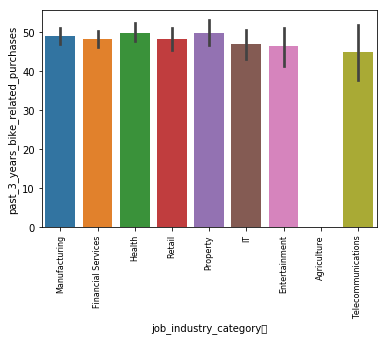

In [119]:
p=sns.barplot(x='job_industry_category\t',y='past_3_years_bike_related_purchases',order=['Manufacturing','Financial Services','Health','Retail','Property','IT','Entertainment','Agriculture','Telecommunications'],data=customer_demographic)
p.set_xticklabels(labels=['Manufacturing','Financial Services','Health','Retail','Property','IT','Entertainment','Agriculture','Telecommunications'],rotation=90, fontsize=8)

In [ ]:
'''with sns.axes_style('whitegrid'):
    p = sns.factorplot(data=df_overall, x='item', y='QWK', order=item_order, hue='subject', kind='bar', size=3, aspect=4, legend=False)
    p.set_xticklabels(rotation=90, fontsize=8)
'''

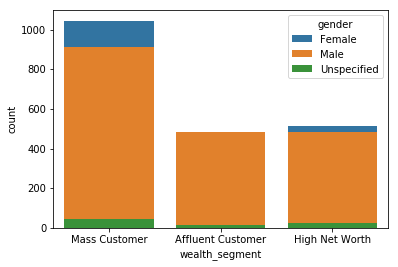

In [94]:
sns.countplot(x='wealth_segment',hue='gender', data=customer_demographic, dodge=False);



## Exploring new customer dataset

In [121]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,4003,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312


In [123]:
new_customer_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
customer_id                            1000 non-null int64
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null object
DOB                                    983 non-null object
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null object
address                                1000 non-null object
postcode                               1000 non-null object
state                                  1000 non-null object
country                                1000 non-null objec

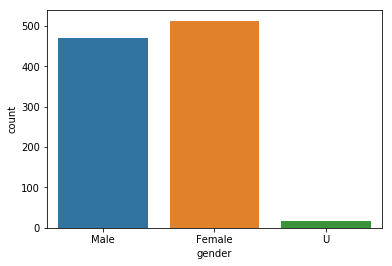

In [122]:
sns.countplot('gender',data=new_customer_lists)

## Around 51% females purchased bike in last three years as compare to 47% male purchased.

## The target audience for marketing should me for focused on females than males.


In [126]:
new_customer_lists['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

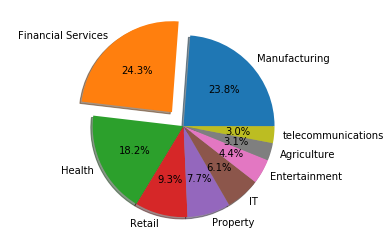

In [127]:
# Data to plot
labels = ('Manufacturing', 'Financial Services', 'Health', 'Retail' , 'Property','IT','Entertainment','Agriculture','telecommunications')
sizes = [199, 203, 152, 78,64,51,37,26,25]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.2, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice ie how much slice will be separated

# Plot
plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True)#autopct will show percentage in floating channel

plt.axis('equal')
plt.show()

## =>Mostly new customers are on Finance industry and Manufacturing customers are still on top two  

## =>whereas in old_customers both were almost the same

## => The rest industries is still same 


In [128]:
altering_new=new_customer_lists

In [133]:
altering_new

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,4003,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312
6,4006,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7,6,1.67188
7,4007,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.67188
8,4008,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,Yes,10,85 Carioca Point,4814,QLD,Australia,5,8,1.65625
9,4009,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.65625
10,4010,Barthel,Docket,Male,72,1985-08-02,Accounting Assistant IV,IT,Mass Customer,Yes,17,80 Scofield Junction,4151,QLD,Australia,5,10,1.64062


In [140]:
now = pd.Timestamp('now')
altering_new['DOB'] = pd.to_datetime(altering_new['DOB'])    # 1
altering_new['DOB'] =altering_new['DOB'].where(altering_new['DOB'] < now, altering_new['DOB'] -  np.timedelta64(100, 'Y'))   # 2
altering_new['age'] = (now - altering_new['DOB']).astype('<m8[Y]')    # 3


      customer_id first_name     last_name  gender  \
1            4001    Chickie       Brister    Male   
2            4002      Morly        Genery    Male   
3            4003    Ardelis     Forrester  Female   
4            4004     Lucine         Stutt  Female   
5            4005    Melinda        Hadlee  Female   
6            4006      Druci       Brandli  Female   
7            4007   Rutledge         Hallt    Male   
8            4008     Nancie          Vian  Female   
9            4009       Duff     Karlowicz    Male   
10           4010    Barthel        Docket    Male   
11           4011   Rockwell        Matson    Male   
12           4012    Wheeler       Winward    Male   
13           4013       Olag           NaN    Male   
14           4014      Melba      Spellacy  Female   
15           4015     Mandie        Feares  Female   
16           4016      Dukie         Swire    Male   
17           4017   Marcelia     Monkleigh  Female   
18           4018  Winnifred

In [141]:
altering_new

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
1,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,62.0
2,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,50.0
3,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875,45.0
4,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312,41.0
5,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312,54.0
6,4006,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7,6,1.67188,69.0
7,4007,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.67188,43.0
8,4008,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,Yes,10,85 Carioca Point,4814,QLD,Australia,5,8,1.65625,47.0
9,4009,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.65625,48.0
10,4010,Barthel,Docket,Male,72,1985-08-02,Accounting Assistant IV,IT,Mass Customer,Yes,17,80 Scofield Junction,4151,QLD,Australia,5,10,1.64062,34.0


In [157]:
altering_new['age'].astype(str)



1       62.0
2       50.0
3       45.0
4       41.0
5       54.0
6       69.0
7       43.0
8       47.0
9       48.0
10      34.0
11      25.0
12      20.0
13      30.0
14      43.0
15      56.0
16      66.0
17      26.0
18      44.0
19      81.0
20      65.0
21      51.0
22      26.0
23      22.0
24      42.0
25      37.0
26      74.0
27      68.0
28      53.0
29      59.0
30      59.0
        ... 
971     52.0
972     21.0
973     22.0
974     54.0
975     19.0
976     52.0
977     53.0
978     81.0
979     43.0
980     34.0
981     28.0
982     68.0
983     64.0
984     68.0
985      nan
986     32.0
987     60.0
988     22.0
989     77.0
990     74.0
991     66.0
992     46.0
993     46.0
994     60.0
995     29.0
996     60.0
997     18.0
998     65.0
999     67.0
1000    64.0
Name: age, Length: 1000, dtype: object